In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
filepath = "proj1Dataset.xlsx"
df  = pd.read_excel(filepath)

In [21]:
df.describe()

,Weight,Horsepower
count,406.000000,400.000000
mean,2979.413793,105.082500
std,847.004328,38.768779
min,1613.000000,46.000000
25%,2226.500000,75.750000
50%,2822.500000,95.000000
75%,3618.250000,130.000000
max,5140.000000,230.000000


In [22]:
df.head()

,Weight,Horsepower
0,3504,130.0
1,3693,165.0
2,3436,150.0
3,3433,150.0
4,3449,140.0


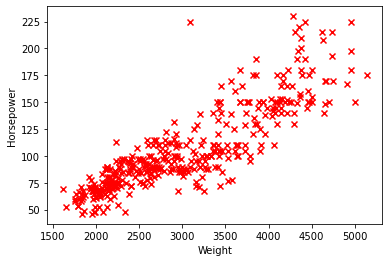

In [23]:
df_plot = plt.scatter(x=df['Weight'],y=df['Horsepower'],c='red',marker='x')
df_plot = plt.xlabel("Weight")
df_plot = plt.ylabel("Horsepower")
df_plot = plt.show()

In [24]:
rows = df['Weight'].shape[0]
features = np.array(df['Weight'])
# create matrix of shape N x D
features = np.reshape(features, (rows, 1))
X0 = np.ones((rows,1))
features.shape

(406, 1)

In [25]:
# create design matrix of shape N x D+1
design_matrix = np.hstack((features, X0))
design_matrix.shape

(406, 2)

In [26]:
pseudoinverse = np.linalg.pinv(design_matrix)
pseudoinverse.shape

(2, 406)

In [27]:
t = df['Horsepower']
t = pd.DataFrame(t, columns=["Horsepower"])
t = t.fillna(int(df['Horsepower'].mean()))
t.describe()

,Horsepower
count,406.000000
mean,105.081281
std,38.480533
min,46.000000
25%,76.000000
50%,95.000000
75%,129.000000
max,230.000000


In [28]:
W = pseudoinverse@t
W

,Horsepower
0,0.039191
1,-11.683835


In [29]:
Y = design_matrix@W
Y.shape

(406, 1)

Text(0.5, 1.0, "Matlab's 'carbig' dataset ")

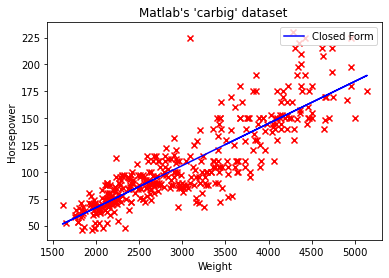

In [30]:
plt.scatter(df['Weight'], df['Horsepower'],c='red',marker='x')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.plot(df['Weight'], Y, c='b',label='Closed Form')
plt.legend(loc='upper right')
plt.title("Matlab's 'carbig' dataset ")

In [31]:
def J(weight, design, target):
    """ Input: W: weight matrix 1,1   (D+1X1)
               X: design matrix 406,2 (NXD+1)
               t: target vector 406,1 (NX1)
        Output: gradient with respect to W  1,2 (1XD+1) 
        gradient of J = W^T.X^T.X - t^T.X 
        (with respect to W)"""
    return 2 * weight.T.dot(design.T.dot(design)) - 2 * target.T.dot(design)

In [32]:
""" Function to check if the last few outputs were closer than 0.001 """

' Function to check if the last few outputs were closer than 0.001 '

In [33]:
W0 = np.random.randn(2,1)
weightX = pd.DataFrame(design_matrix, columns=['Weight', 'W0'])
learning_rate = 0.0000000001
num_iterations = 5000
print(W0)
W_GD = W0
J(W0, weightX, t)

[[-1.53521787]
 [-0.57040089]]


,Weight,W0
Horsepower,-1.223643e+10,-3.799917e+06


In [34]:
for i in range(num_iterations):
    W_temp = W_GD - learning_rate*(J(W_GD, weightX, t).T)
    W_GD = W_temp

In [35]:
print(W_GD)

        Horsepower
Weight    0.035739
W0       -0.570250


Text(0.5, 1.0, "Matlab's 'carbig' dataset ")

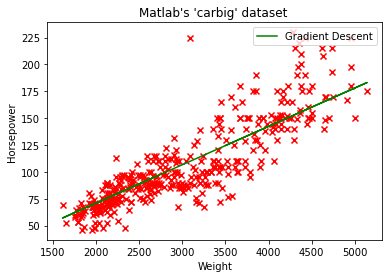

In [36]:
Y_GD = design_matrix@W_GD
plt.scatter(df['Weight'], df['Horsepower'],c='red',marker='x')
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.plot(df['Weight'], Y_GD, c='g',label='Gradient Descent')
plt.legend(loc='upper right')
plt.title("Matlab's 'carbig' dataset ")